In [1]:
import statsmodels.api as sm
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import rcParams
import scipy.stats as stats
from matplotlib import pyplot as plt

rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Roboto']


col = ['#5052c7', '#1c84b3', '#0fb390', '#f09816', '#fb3856', '#41429f', '#166a8f', '#0b9072', '#c07a12', '#c92d45']

In [2]:
car_df  = pd.read_csv('https://raw.githubusercontent.com/magtanggol03/dec130/master/datasets/Analytics%20Edge/Elantra.csv', header = 0)

In [3]:
car_df.head(5)

,Month,Year,ElantraSales,Unemployment,Queries,CPI.Energy,CPI.All
0,1,2010,7690,9.7,153,213.377,217.466
1,1,2011,9659,9.1,259,229.353,221.082
2,1,2012,10900,8.2,354,244.178,227.666
3,1,2013,12174,7.9,230,242.560,231.321
4,1,2014,15326,6.6,232,247.575,234.933


In [4]:
pd.get_dummies(car_df['Month'])

,1,2,3,4,5,6,7,8,9,10,11,12
0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0
5,0,1,0,0,0,0,0,0,0,0,0,0
6,0,1,0,0,0,0,0,0,0,0,0,0
7,0,1,0,0,0,0,0,0,0,0,0,0
8,0,1,0,0,0,0,0,0,0,0,0,0
9,0,1,0,0,0,0,0,0,0,0,0,0


In [5]:
car_df = pd.concat([car_df, pd.get_dummies(car_df['Month'])], axis = 1).drop(columns=['Month', 1])

In [6]:
car_df = pd.concat([car_df, pd.get_dummies(car_df['Year'])], axis = 1).drop(columns=['Year', 2010])

In [7]:
car_df.head(5)

,ElantraSales,Unemployment,Queries,CPI.Energy,CPI.All,2,3,4,5,6,7,8,9,10,11,12,2011,2012,2013,2014
0,7690,9.7,153,213.377,217.466,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9659,9.1,259,229.353,221.082,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,10900,8.2,354,244.178,227.666,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,12174,7.9,230,242.560,231.321,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,15326,6.6,232,247.575,234.933,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [8]:
car_df.corr()

,ElantraSales,Unemployment,Queries,CPI.Energy,CPI.All,2,3,4,5,6,7,8,9,10,11,12,2011,2012,2013,2014
ElantraSales,1.000000,-0.623506,0.480180,0.544328,0.640257,-0.183795,0.141571,0.137366,0.148274,0.152860,0.180452,0.135629,-0.024038,-0.184908,-0.156967,0.042891,-0.055205,0.096476,0.540478,-0.006156
Unemployment,-0.623506,1.000000,-0.349408,-0.701494,-0.963583,-0.043172,0.071375,0.079201,0.047896,0.040070,0.024418,0.008765,-0.014713,-0.030366,-0.038192,-0.092975,0.305045,-0.207009,-0.639520,-0.383989
Queries,0.480180,-0.349408,1.000000,0.760016,0.508056,-0.126428,-0.018068,-0.007563,0.024905,0.050689,0.215897,0.091752,0.119446,-0.024752,-0.153672,-0.073455,0.421133,0.376851,0.009851,-0.072661
CPI.Energy,0.544328,-0.701494,0.760016,1.000000,0.840991,0.017624,-0.026468,-0.017866,-0.038175,-0.069147,-0.064323,-0.006628,0.056601,0.075507,0.043786,0.064395,0.253864,0.338373,0.276485,0.134443
CPI.All,0.640257,-0.963583,0.508056,0.840991,1.000000,0.014481,-0.073805,-0.058064,-0.046760,-0.037549,-0.021244,0.007392,0.035439,0.053423,0.061995,0.078538,-0.172634,0.273203,0.594311,0.288428
2,-0.183795,-0.043172,-0.126428,0.017624,0.014481,1.000000,-0.098295,-0.098295,-0.098295,-0.098295,-0.098295,-0.098295,-0.098295,-0.098295,-0.098295,-0.098295,-0.031220,-0.031220,-0.031220,0.272166
3,0.141571,0.071375,-0.018068,-0.026468,-0.073805,-0.098295,1.000000,-0.086957,-0.086957,-0.086957,-0.086957,-0.086957,-0.086957,-0.086957,-0.086957,-0.086957,0.006905,0.006905,0.006905,-0.060193
4,0.137366,0.079201,-0.007563,-0.017866,-0.058064,-0.098295,-0.086957,1.000000,-0.086957,-0.086957,-0.086957,-0.086957,-0.086957,-0.086957,-0.086957,-0.086957,0.006905,0.006905,0.006905,-0.060193
5,0.148274,0.047896,0.024905,-0.038175,-0.046760,-0.098295,-0.086957,-0.086957,1.000000,-0.086957,-0.086957,-0.086957,-0.086957,-0.086957,-0.086957,-0.086957,0.006905,0.006905,0.006905,-0.060193
6,0.152860,0.040070,0.050689,-0.069147,-0.037549,-0.098295,-0.086957,-0.086957,-0.086957,1.000000,-0.086957,-0.086957,-0.086957,-0.086957,-0.086957,-0.086957,0.006905,0.006905,0.006905,-0.060193


In [8]:
model = sm.OLS(car_df['ElantraSales'], sm.add_constant(car_df['Queries'])).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           ElantraSales   R-squared:                       0.231
Model:                            OLS   Adj. R-squared:                  0.215
Method:                 Least Squares   F-statistic:                     14.38
Date:                Sun, 17 Feb 2019   Prob (F-statistic):           0.000417
Time:                        20:28:17   Log-Likelihood:                -488.62
No. Observations:                  50   AIC:                             981.2
Df Residuals:                      48   BIC:                             985.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8075.2869   2178.839      3.706      0.001    3694.438    1.25e+04
Queries       30.0977      7.936      3.793      0.000      14.142      46.054
==============================================================================
Omnibus:                        2.587   Durbin-Watson:                   1.676
Prob(Omnibus):                  0.274   Jarque-Bera (JB):                2.478
Skew:                           0.506   Prob(JB):                        0.290
Kurtosis:                       2.592   Cond. No.                         976.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\Jun\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\Jun\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


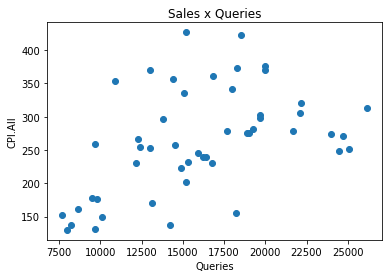

In [9]:
plt.scatter(x = car_df['ElantraSales'], y = car_df['Queries'])
plt.xlabel(car_df.columns[2])
plt.ylabel(car_df.columns[4])
plt.title('Sales x Queries')
plt.show()

In [10]:
model = sm.OLS(car_df['ElantraSales'], sm.add_constant(car_df[['Unemployment', 'Queries',2011, 2012, 2013, 2014, 'CPI.All','CPI.Energy', 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]])).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           ElantraSales   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     11.13
Date:                Sun, 17 Feb 2019   Prob (F-statistic):           7.29e-09
Time:                        20:30:22   Log-Likelihood:                -443.02
No. Observations:                  50   AIC:                             926.0
Df Residuals:                      30   BIC:                             964.3
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         4.566e+05   1.74e+05      2.621      0.014    1.01e+05    8.12e+05
Unemployment -5488.2466   2512.657     -2.184      0.037   -1.06e+04    -356.717
Queries         -1.8721     10.274     -0.182      0.857     -22.855      19.110
2011          4974.6868   4597.123      1.082      0.288   -4413.891    1.44e+04
2012          1.088e+04   8707.386      1.249      0.221   -6904.846    2.87e+04
2013          1.847e+04   1.21e+04      1.528      0.137   -6208.109    4.31e+04
2014          1.983e+04   1.58e+04      1.252      0.220   -1.25e+04    5.22e+04
CPI.All      -2163.0375    882.251     -2.452      0.020   -3964.834    -361.241
CPI.Energy     338.4103    116.570      2.903      0.007     100.343     576.477
2             2457.2472   1429.956      1.718      0.096    -463.113    5377.608
3             8663.5538   1621.353      5.343      0.000    5352.309     1.2e+04
4             9265.6787   1708.450      5.423      0.000    5776.557    1.28e+04
5             9754.6937   1891.976      5.156      0.000    5890.764    1.36e+04
6             1.064e+04   2096.551      5.077      0.000    6362.730    1.49e+04
7             1.152e+04   2423.593      4.754      0.000    6573.308    1.65e+04
8             1.068e+04   2531.741      4.218      0.000    5508.349    1.58e+04
9             7765.2711   2778.161      2.795      0.009    2091.510    1.34e+04
10            5225.7988   2965.124      1.762      0.088    -829.792    1.13e+04
11            6408.5267   3194.400      2.006      0.054    -115.307    1.29e+04
12            9120.2937   3527.137      2.586      0.015    1916.919    1.63e+04
==============================================================================
Omnibus:                        0.450   Durbin-Watson:                   2.911
Prob(Omnibus):                  0.798   Jarque-Bera (JB):                0.590
Skew:                           0.186   Prob(JB):                        0.744
Kurtosis:                       2.619   Cond. No.                     2.39e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.39e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""